**Test file**

In [1]:
#imports

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read in images
'''
hier könnte ihre Werbung stehen
'''

**Image with polygon and label**

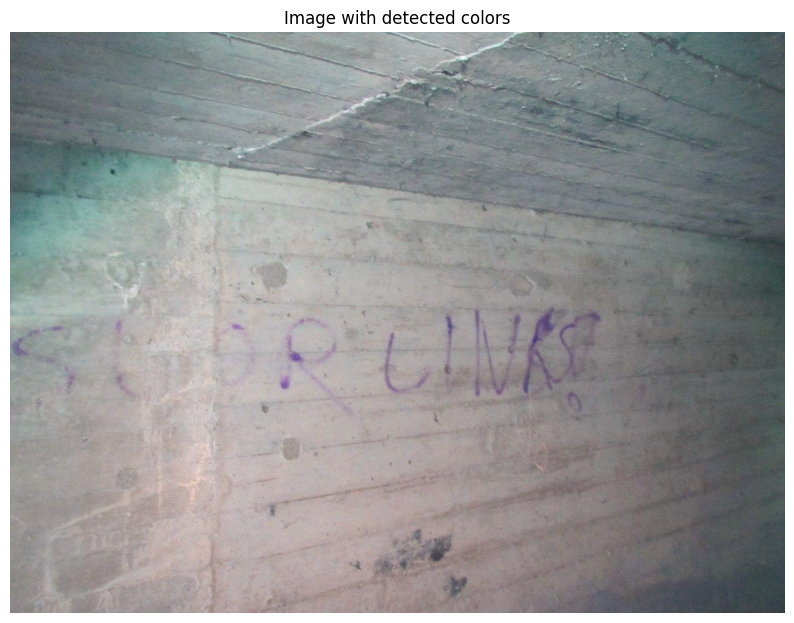

In [2]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0005.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
grey_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Print image:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title("Image with detected colors")
plt.axis('off')
plt.show()

**Create image with overlay polygons**

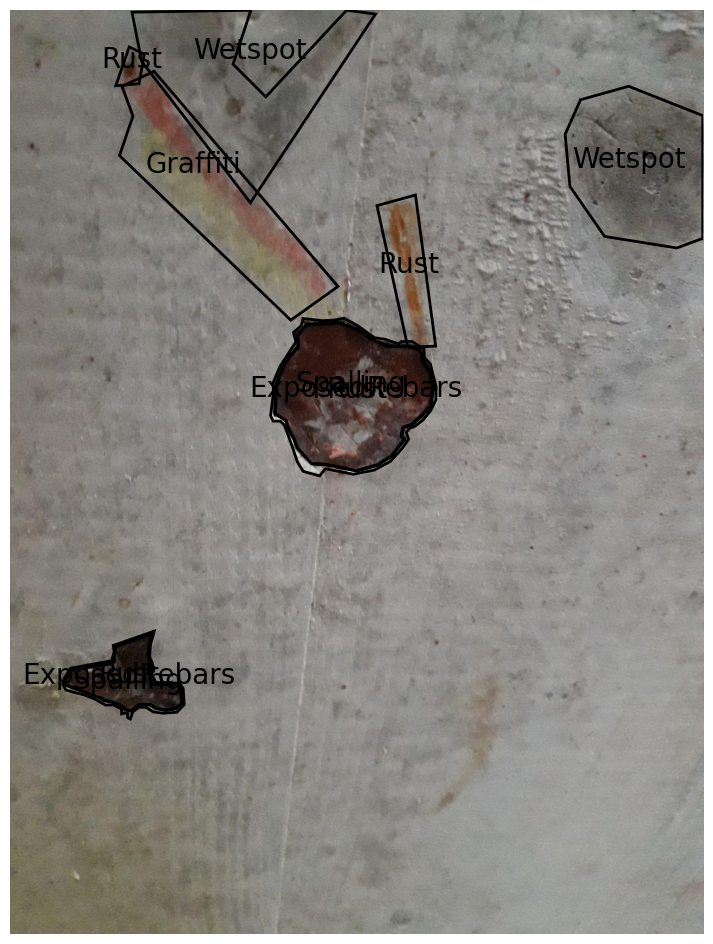

In [3]:
# Imports:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from PIL import Image

# Image number:
image_number_string = "0045"

# Read in image: 
path = "data/dacl10k_v2_devphase/images/train/"
file = f"dacl10k_v2_train_{image_number_string}.jpg"
image_path = path + file
image = Image.open(image_path).convert('RGB')

# Read in corresponding annotations: 
path = "data/dacl10k_v2_devphase/annotations/train/"
file = f"dacl10k_v2_train_{image_number_string}.json"
annotations_path = path + file
with open(annotations_path, 'r') as file:
    annotations = json.load(file)
shapes = annotations["shapes"]

# Draw image with polygons: 
fig, ax = plt.subplots(1, figsize=(20,12))
ax.imshow(image)
for polygon in shapes:
    points = polygon['points']
    label = polygon['label']
    polygon = patches.Polygon(points, closed=True, edgecolor='black', fill=False, linewidth=2, label=label)
    ax.add_patch(polygon)
    centroid_x = sum([point[0] for point in points]) / len(points)
    centroid_y = sum([point[1] for point in points]) / len(points)
    ax.text(centroid_x, centroid_y, label, color='black', fontsize=20, ha='center')
plt.axis('off')
plt.show()



In [4]:
image_copy = np.copy(image)

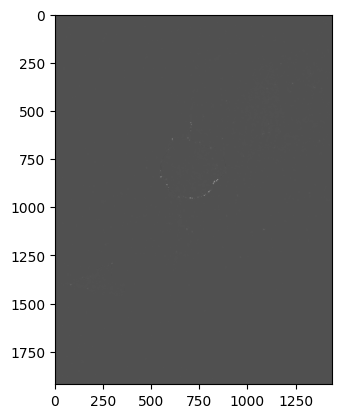

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

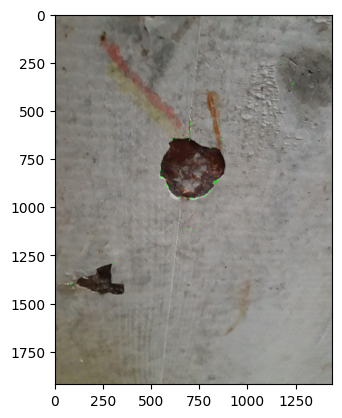

In [6]:
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

C:\Users\User\AppData\Local\Temp\ipykernel_18172\1234820956.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


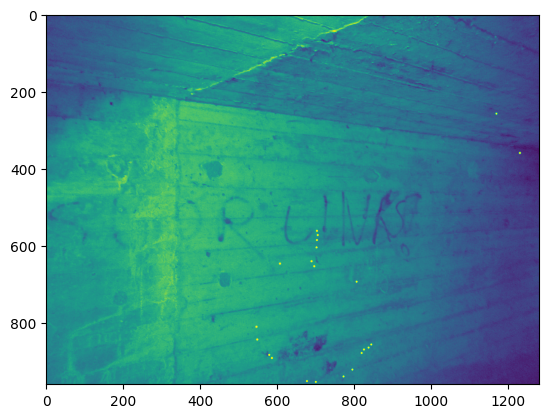

(<matplotlib.image.AxesImage at 0x2a34a3a6150>, None)

In [11]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
 
for i in corners:
 x,y = i.ravel()
 cv2.circle(img,(x,y),3,255,-1)
 
plt.imshow(img),plt.show()

In [16]:
from shapely.geometry import Polygon, box
from shapely.affinity import scale, affine_transform

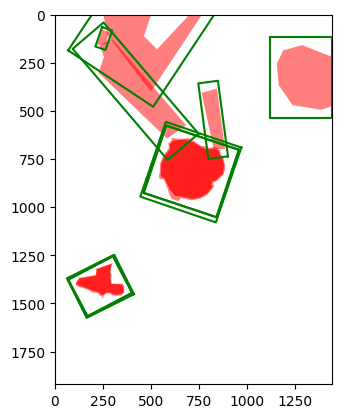

In [19]:
data = annotations
image_width = data["imageWidth"]
image_height = data["imageHeight"]
image_bounds = box(0, 0, image_width, image_height)
scaling = 1.25

fig, ax = plt.subplots()
ax.set_xlim(0, image_width)
ax.set_ylim(0, image_height)
ax.set_aspect('equal')

for shape in data['shapes']:
    polygon = Polygon(shape['points'])
    min_rect = polygon.minimum_rotated_rectangle
    rect_center = min_rect.centroid
    scaled_rect = scale(min_rect, xfact=scaling, yfact=scaling, origin=rect_center)

    clipped_rect = scaled_rect.intersection(image_bounds)

    # Plotting the polygon
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='r', ec='none')

    # Plotting the minimum area rectangle
    x, y = clipped_rect.exterior.xy
    ax.plot(x, y, 'g')

plt.gca().invert_yaxis()  # Invert Y axis to match image coordinate system
plt.show()